In [1]:
import pandas as pd
import numpy as np
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rc('font',family='JasmineUPC')


## Importing dataset
--------
The data is from facebook comments on fanpage of the three internet provider in Thailand : Dtac, TRUE, and AIS

In [2]:
%%time

commentDf = pd.read_csv('../dataset/facebook_comment.tsv',sep ='\t')
commentDf.head()

Wall time: 1.15 s


<string>:2: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.


In [3]:
commentDf['service'][commentDf['service']==True] = 'TRUE'

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
print(commentDf.shape)

(172930, 12)


In [5]:
print("Dataset has %d comment with %d distinct commenter"%(commentDf.shape[0],commentDf['commenter_name'].unique().shape[0]))

Dataset has 172930 comment with 113491 distinct commenter


## Ignore provider for now
------
Let's see how much people has said 'ย้ายค่าย'

In [6]:
commentDf['created_date'] = pd.to_datetime(commentDf['created_time'], format='%Y-%m-%d %H:%M:%S.%f')
commentDf['created_date_format'] = commentDf['created_date'].apply(lambda x: x.replace(hour=0, minute=0, second=0, microsecond=0))

In [7]:
def getMonth(row):
    return row['created_date'].month
def getYear(row):
    return row['created_date'].year
def getDay(row):
    return row['created_date'].day
commentDf['year'] = commentDf.apply(getYear,axis=1)
commentDf['month'] = commentDf.apply(getMonth,axis=1)
commentDf['day'] = commentDf.apply(getDay,axis=1)

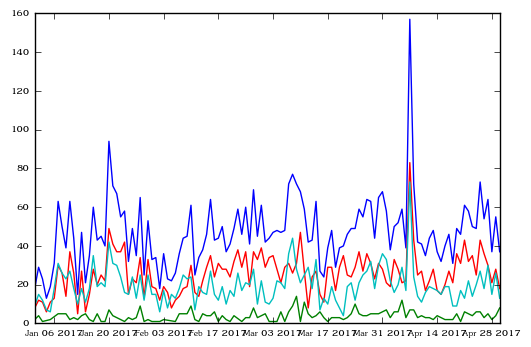

In [8]:
def countWordByMonth(word,month):
    
    commentDf['hasWord'] = commentDf['message'].apply(lambda x: any(s in str(x) for s in word))
    

    hasWord = commentDf['created_date_format'][(commentDf['hasWord']==1)& (commentDf['month'].isin(month))].value_counts().sort_index()
    total = commentDf['created_date_format'][(commentDf['month'].isin(month))].value_counts().sort_index()
    y = total
    x = y.index
    #plt.plot(x,y,label='Total')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    #plt.show()
    
    y = hasWord
    x = y.index
    plt.plot(x,y,label='All words')
    
    
    for w in word:
        commentDf['hasWord'] = commentDf['message'].apply(lambda x: w in str(x))
        hasWord = commentDf['created_date_format'][(commentDf['hasWord']==1)& (commentDf['month'].isin(month))].value_counts().sort_index()
        y = hasWord
        x = y.index
        plt.plot(x,y,label=w)
    #plt.ylim(0,30)
    plt.show()
    
    
countWordByMonth(['เน็ตช้า','ย้ายค่าย','กาก'],[1,2,3,4])        

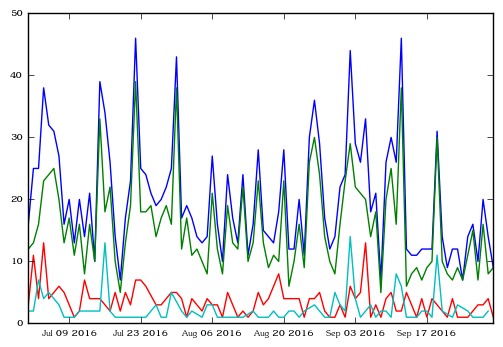

In [9]:
countWordByMonth(['เร็ว','ลื่น','สุดยอด'],[7,8,9])

In [33]:
def sampleCommentWithWords(words,months=[1,2,3,4,5,6,7,8,9,10,11,12],num=5):
    commentDf['hasWord'] = commentDf['message'].apply(lambda x: any(s in str(x) for s in words))
    hasWord = commentDf[(commentDf['hasWord']==1)& (commentDf['month'].isin(months))]
    return hasWord.sample(num)[['message','commenter_name','created_time','service']]
sampleCommentWithWords(['เน็ตช้า','ย้ายค่าย'])

,message,commenter_name,created_time,service
50942,ขนาดผมใช้โปร 1499 บางครั้งสัญญาณเน็ต สัญญาณโทร...,ธีระวัฒน์ ทิศรอด,2017-03-10 22:55:02,DTAC
9881,หลอกลวงดูอะไรไม่ได้หมุนไม่หยุดจ่ายโปรเพิ่มยังเ...,อนุรักษ์ ดินน้ำและพันธุ์พืช,2016-07-15 11:03:50,DTAC
89878,แพคเกจรายเดือนก็แพงแสนแพง เมื่อเดือนส.ค.ไปรับซ...,Sora Minne,2016-11-30 14:40:03,AIS
149978,อัดฉีดโปรโมชั่น แต่ไม่พัฒนาเครือข่ายสัญญา อยาก...,Panutda Archacharoensuk,2017-01-13 07:14:34,TRUE
16405,เน็ตกากมาก ใช้มา 10 กว่าปียังไม่พัฒนาก้อจะย้าย...,Daeng Ja,2016-09-14 12:04:52,DTAC


### Searching positive sentiment with bipolar word might not we a good idea because those word also occur in negative comment

-------

In [14]:
samples = sampleCommentWithWords(['เร็ว','ลื่น'],[1,2,3],10)
samples

,message,commenter_name,created_time
51917,อีกหย่างนะทีพนักงานดีแทคไม่บอกเอาอายุการใช้งาน...,สมศักดิ์ คนขายติม,2017-03-24 12:44:54
38677,แถวบ้านนอกเลนน่ะ ใช้ดี ลื่นไหลในราคาแพคเกทที่ใ...,S Puen SK,2017-01-10 14:04:43
44174,"ไหนบอกว่าลื่นไงครับ ,,,, ขนาดเพิ่มเน็ตให้มานะ ...",Natee Sirisook,2017-03-10 01:36:22
43264,โฆษณาแล้ว ทำให้สัญญาณลื่นได้จริงหรือคะ?,オー ランスィマー,2017-02-01 13:32:49
151777,สอลถามหน่อยครับ ทำไมโทรเฟส โทรไลน์ สัญญาณไม่เส...,Teeranai Tangsopa,2017-01-25 16:25:04
55088,เร็วๆเอาสิทธิ์พิเศษมาเร็วๆ ผมกำลังเล่น สัญญาณ...,ควยเอ๊ยเลิกเล่นแม่งสักพัก น่าเบื่อเหี้ยเหี้ย,2017-03-31 13:13:21
39029,เดินหาคลื่นจนลื่นล้ม,ยะ อุไรรัมย์,2017-01-10 14:22:39
38268,ลื่นมากครับ~\nเล่นเกมส์ลื่นจนตายเลยบางครั้งลื่...,ต้า'เกิดมาลั่น สายบันเทิง,2017-01-07 08:54:28
154943,สมัครโปร22/วัน. หมุนติ้วไปจะดูคลิปในเฟสก็ไม่ได...,วิทวัส ท้าวเนาว์,2017-02-21 11:34:11
39427,ทำ3Gให้ลื่นก่อนเถอะ 3gยังกากอยุเลยจะไป4g ละ,ชื่อ' อาต',2017-01-18 15:03:24


## Next, comparing the three provider 'ย้ายค่าย' counts
-------
We will assume the word 'ย้ายค่าย' is negative. Let's see first how many comments each provider has.

In [21]:
serviceCounts = commentDf['service'].value_counts()
serviceCounts

DTAC    64089
AIS     59528
TRUE    49305
Name: service, dtype: int64

In [26]:
words = ['ย้ายค่าย']
def wordCountByService(words):
    commentDf['YaiKaai'] = commentDf['message'].apply(lambda x: any(s in str(x) for s in words))
    dtacYai = commentDf[(commentDf['hasWord']==1)& (commentDf['service']=='DTAC')]
    trueYai = commentDf[(commentDf['hasWord']==1)& (commentDf['service']=='TRUE')]
    AISYai = commentDf[(commentDf['hasWord']==1)& (commentDf['service']=='AIS')]
    print("Dtac has %d comment with words 'ย้ายค่าย' from %d, which is %d percent"%(dtacYai.shape[0],serviceCounts['DTAC'],dtacYai.shape[0]*100/serviceCounts['DTAC']))
    print("TRUE has %d comment with words 'ย้ายค่าย' from %d, which is %d percent'"%(trueYai.shape[0],serviceCounts['TRUE'],trueYai.shape[0]*100/serviceCounts['TRUE']))
    print("AIS has %d comment with words 'ย้ายค่าย' from %d , which is %d percent'"%(AISYai.shape[0],serviceCounts['AIS'],AISYai.shape[0]*100/serviceCounts['AIS']))
wordCountByService(words)

Dtac has 5853 comment with words 'ย้ายค่าย' from 64089, which is 9 percent
TRUE has 2339 comment with words 'ย้ายค่าย' from 49305, which is 4 percent'
AIS has 2025 comment with words 'ย้ายค่าย' from 59528 , which is 3 percent'


In [36]:
samples = sampleCommentWithWords(['ย้ายค่าย'])
samples

,message,commenter_name,created_time,service
159341,เรียนคณะกรรมการ กสทช\n\nเดือน กพ.-มีค. 2560 ผม...,ธนิด ภัทรกิตติ,2017-03-20 04:21:14,TRUE
35823,ถ้าสมมุติซิมเพิ่งเปิดใช้ได้ 2-3 วัน แล้วย้ายค่...,Arty Wattanachai,2016-12-24 13:54:15,DTAC
15572,หลอกกันได้น้ะ ดีแหกย้ายค่ายหนี้ดีไหม,เฉลิมเกียรติ ยานะชาติ,2016-09-09 02:15:25,DTAC
46227,ย้ายค่ายมา และซื้อ I phone เครื่องมีปัญหา บอก...,B'mee It'me Wani,2017-02-15 04:17:36,DTAC
53212,ปรกติใช้รายเดื่อนพร้อมเน็ตเดื่อน499\nแต่เชื่อม...,Pa Pa,2017-04-04 13:32:57,DTAC
